# Chargement des données

# Visualisation des données

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_excel('Cleaned_Camp_Market.xlsx', engine='openpyxl')
    print("Lecture du fichier Excel réussie !")

except FileNotFoundError:
    print("Erreur : Le fichier 'Camp_Market.xlsx' est introuvable.")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier Excel : {e}")


Lecture du fichier Excel réussie !


In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


# Transformation des données

In [22]:
df['Age'] = pd.to_datetime('today').year - df['Year_Birth']
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Living_with'] = df['Marital_Status'].apply(lambda x: 'couple' if x in ['Married', 'Together'] else 'single')
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_size'] = df['Children'] + df['Living_with'].apply(lambda x: 2 if x == 'couple' else 1)
df['Is_parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)


def simplify_education(education):
    if education in ['Basic', '2n Cycle', 'Graduation']:
        return 'undergrad'
    elif education == 'Master':
        return 'grad'
    elif education == 'PhD':
        return 'postgrad'

df['Education2'] = df['Education'].apply(simplify_education)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_for'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days


df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Total_Spent,Age,Spent,Living_with,Children,Family_size,Is_parent,Education2,Customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,1617,67,1617,single,0,1,0,undergrad,4425
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,27,70,27,single,2,3,1,undergrad,3875
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,776,59,776,couple,0,2,0,undergrad,4074
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,53,40,53,couple,1,3,1,undergrad,3901
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,422,43,422,couple,1,3,1,postgrad,3923


# Exploration des données

In [23]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Total_Spent,Age,Spent,Children,Family_size,Is_parent,Customer_for
count,2231.000000,2231.000000,2211.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,...,2231.0,2231.0,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,5593.013447,1968.860601,52255.488014,0.445092,0.506051,49.141192,303.561183,26.212461,165.327656,37.493949,...,3.0,11.0,0.148812,603.598835,55.139399,603.598835,0.951143,2.596593,0.715823,4115.338861
std,3244.021769,11.783466,25169.637752,0.538651,0.543889,28.970114,336.604862,39.631697,221.251698,54.631286,...,0.0,0.0,0.355983,601.037302,11.783466,601.037302,0.750986,0.907106,0.451123,202.082068
min,0.000000,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,5.000000,28.000000,5.000000,0.000000,1.000000,0.000000,3762.000000
25%,2830.000000,1959.000000,35284.000000,0.000000,0.000000,24.000000,23.500000,1.000000,16.000000,3.000000,...,3.0,11.0,0.000000,68.000000,47.000000,68.000000,0.000000,2.000000,0.000000,3942.000000
50%,5474.000000,1970.000000,51390.000000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,...,3.0,11.0,0.000000,395.000000,54.000000,395.000000,1.000000,3.000000,1.000000,4117.000000
75%,8423.500000,1977.000000,68557.000000,1.000000,1.000000,74.000000,503.500000,33.000000,230.000000,50.000000,...,3.0,11.0,0.000000,1041.000000,65.000000,1041.000000,1.000000,3.000000,1.000000,4290.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,3.0,11.0,1.000000,2525.000000,124.000000,2525.000000,3.000000,5.000000,1.000000,4461.000000


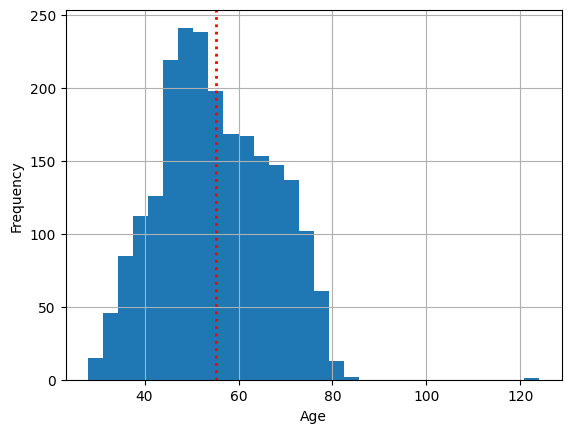

In [24]:
average = np.mean(df['Age'])
plt.axvline(x=average, color='red', linestyle='dotted', linewidth=2)
df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

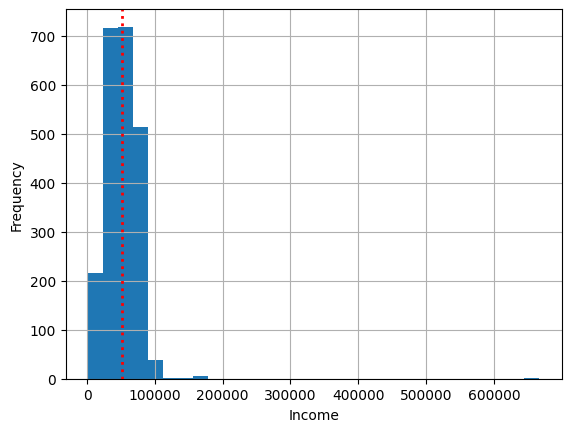

In [25]:
df['Income'].hist(bins=30)
average = np.mean(df['Income'])
plt.axvline(x=average, color='red', linestyle='dotted', linewidth=2)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

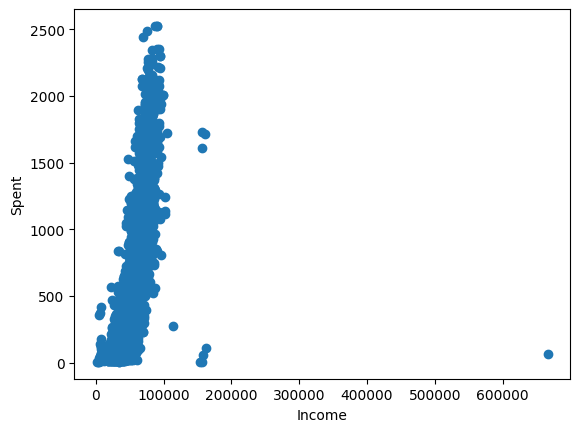

In [26]:
plt.scatter(df['Income'], df['Spent'])
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

# Visualisation des données

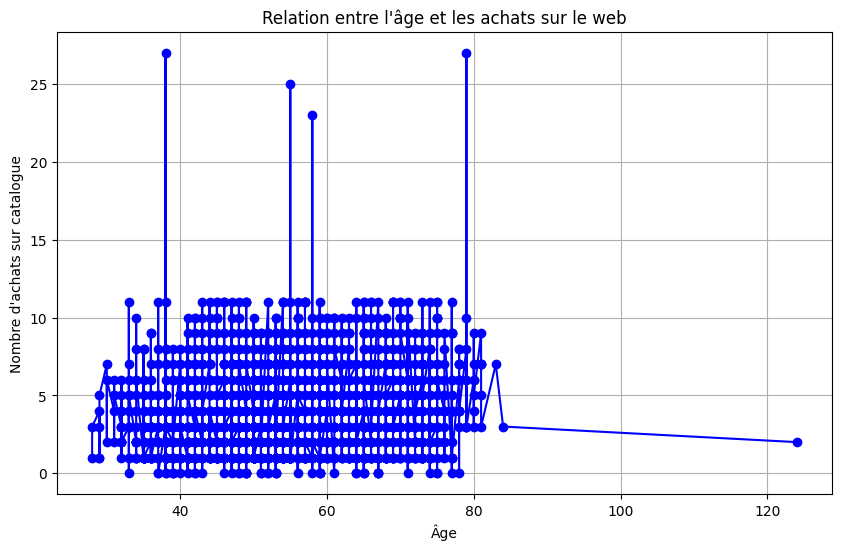

In [27]:
# Trie du DataFrame par âge
df = df.sort_values(by='Age')

# (Age) et nombre d'achats sur catalogue (NumCatalogPurchases)
age = df['Age']
num_catalog_purchases = df['NumWebPurchases']

# Créez le graphique de courbe
plt.figure(figsize=(10, 6))
plt.plot(age, num_catalog_purchases, marker='o', linestyle='-', color='b')
plt.title('Relation entre l\'âge et les achats sur le web')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'achats sur catalogue')

# Affichez la grille pour une meilleure lisibilité
plt.grid(True)
plt.show()


# Visualisation des données

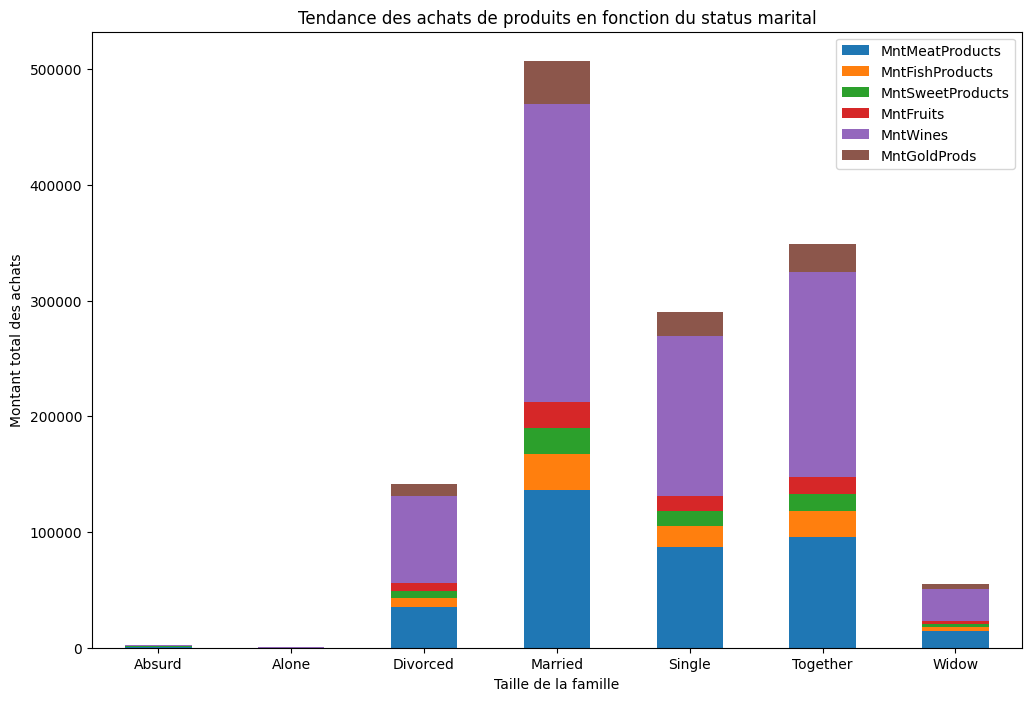

In [28]:
# Selection des Colonnes -> Family_size, MntMeatProducts, MntFishProducts, MntSweetProducts, MntFruits, MntWines, MntGoldProds
selected_columns = ['Marital_Status', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits', 'MntWines', 'MntGoldProds']
df_selected = df[selected_columns]

# Grouper les données par Family_size et calculez la somme des achats de chaque produit
df_grouped = df_selected.groupby('Marital_Status').sum()

# Création du graphique
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Tendance des achats de produits en fonction du status marital')
plt.xlabel('Taille de la famille')
plt.ylabel('Montant total des achats')
plt.xticks(rotation=0) 

# Affichez le graphique
plt.legend(loc='upper right')
plt.show()


# Visualisation des données

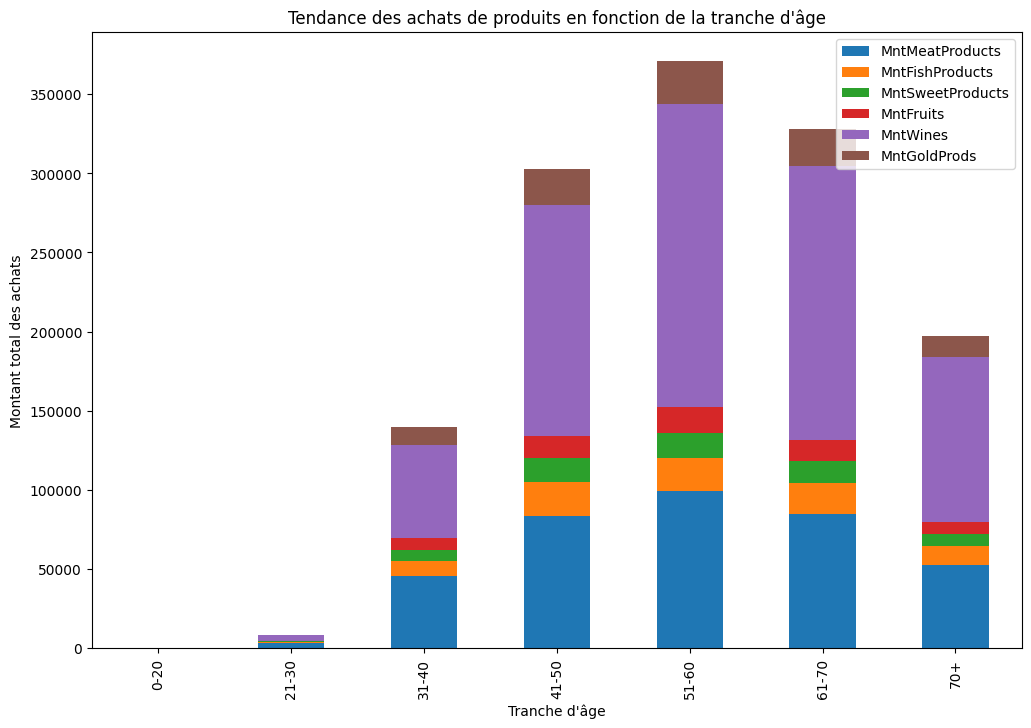

In [29]:
# Tranches d'âge
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Ajoutez une nouvelle colonne 'AgeGroup' au DataFrame en fonction des tranches d'âge
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Sélectionnez les colonnes -> AgeGroup, MntMeatProducts, MntFishProducts, MntSweetProducts, MntFruits, MntWines, MntGoldProds
selected_columns = ['AgeGroup', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits', 'MntWines', 'MntGoldProds']
df_selected = df[selected_columns]

# Groupez les données par AgeGroup et calculez la somme des achats de chaque produit, avec observed=False
df_grouped = df_selected.groupby('AgeGroup', observed=False).sum()

# Créez un graphique en barres empilées
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Tendance des achats de produits en fonction de la tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Montant total des achats')

# Affichez le graphique
plt.legend(loc='upper right')
plt.show()


In [30]:
# Je vais calculer le montant total des achats pour chaque client
df['TotalPurchase'] = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntFruits'] + df['MntWines'] + df['MntGoldProds']

# Maintenant, je vais calculer le panier moyen en prenant la moyenne des montants totaux des achats
panier_moyen = df['TotalPurchase'].mean()

# J'affiche le résultat du calcul du panier moyen
print("Le panier moyen des clients est de :", panier_moyen)


Le panier moyen des clients est de : 603.5988346033168


In [31]:
# Je calcule le nombre total d'achats pour chaque client en additionnant les différents types d'achats
df['TotalPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumDealsPurchases'] + df['NumCatalogPurchases']

# Je calcule ensuite la somme totale des montants d'achat de tous les clients, en combinant tous les types de produits
somme_totale_achats = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntFruits'] + df['MntWines'] + df['MntGoldProds']

# Je calcule maintenant le panier moyen par achat, en divisant la somme totale des achats par le nombre total d'achats
panier_moyen_par_achat = somme_totale_achats.sum() / df['TotalPurchases'].sum()

# J'affiche le résultat du calcul du panier moyen par achat
print("Le panier moyen par achat est de :", panier_moyen_par_achat)


Le panier moyen par achat est de : 34.496221533417014


# Visualisation des données

# Clustering des clients

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialisation du standard scaler
sc = StandardScaler()

# Suppression des colonnes liées aux promotions avant de normaliser les données
df_without_promo = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)

# Sélectionner uniquement les colonnes numériques pour les mettre à l'échelle
numeric_columns = df_without_promo.select_dtypes(include=['number'])

# Mise à l'échelle des données numériques
df_scaled = sc.fit_transform(numeric_columns)

# Initialisation de l'imputer pour gérer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')

# Imputation des valeurs manquantes dans les données mises à l'échelle
df_scaled = imputer.fit_transform(df_scaled)

# Réduire les dimensions avec PCA à 3 composants principaux pour la visualisation
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Application de KMeans pour le clustering (3 clusters choisis)
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_result)

# Récupération des labels des clusters
y_kmeans = kmeans.labels_

# Ajouter les labels des clusters au DataFrame original
df['cluster'] = pd.Series(y_kmeans)

# Création du graphique en 3D pour visualiser les clusters après PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot avec les 3 composantes principales
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=y_kmeans)

# Ajout de la légende pour les clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Affichage du graphique
plt.show()


TypeError: 

# Clustering des clients

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# Je sélectionne les caractéristiques que je souhaite utiliser pour le clustering
features = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits', 'MntWines', 'MntGoldProds']

# Je choisis le nombre de clusters que je veux (ici, 3 clusters)
num_clusters = 3

# Je définis un seuil de tolérance pour évaluer si les clusters sont bien équilibrés (ici 5% autour des 33,33%)
tolerance = 0.05  # Ce seuil peut être ajusté selon les besoins

# Je crée une instance de l'algorithme K-Means avec 3 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# J'applique le clustering sur les données et récupère les labels des clusters
cluster_labels = kmeans.fit_predict(df[features])

# Je compte combien de clients appartiennent à chaque cluster
cluster_counts = np.bincount(cluster_labels)

# Je calcule la proportion de clients dans chaque cluster
proportions = cluster_counts / len(cluster_labels)

# Je vérifie si les proportions sont proches de l'équilibre (environ 33,33% par cluster)
equilibre = all(abs(proportion - 1/num_clusters) < tolerance for proportion in proportions)

# J'affiche les proportions de clients dans chaque cluster
for i, proportion in enumerate(proportions):
    print(f"Proportion de clients dans le cluster {i}: {proportion:.2%}")

# En fonction des proportions, j'affiche si la répartition est équilibrée ou non
if equilibre:
    print("\nLes clusters divisent les clients de manière régulière.")
else:
    print("\nLes clusters ne divisent pas les clients de manière régulière.")


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import csr_matrix, issparse


TypeError: 

# Clustering des clients

In [ ]:
# Je compte le nombre de clients dans chaque cluster à partir des labels KMeans
nbr_customers = np.bincount(y_kmeans)

# Je transforme les labels KMeans en une série pandas pour avoir une vue plus flexible
y_kmeans_series = pd.Series(y_kmeans)

# Je compte à nouveau le nombre de clients dans chaque cluster, mais cette fois en utilisant les fonctionnalités de pandas
nbr_customers = y_kmeans_series.value_counts()

# J'affiche le nombre de clients dans chaque cluster
print(nbr_customers)

# Visualisation des données

# Clustering des clients

In [ ]:
import matplotlib.pyplot as plt

# Je crée un graphique de dispersion montrant la relation entre le revenu ('Income') et les dépenses ('Spent')
# Les points sont colorés en fonction des clusters KMeans (y_kmeans)
plt.scatter(df['Income'], df['Spent'], c=y_kmeans, cmap='viridis')

# J'ajoute des étiquettes aux axes pour rendre le graphique plus lisible
plt.xlabel('Income')
plt.ylabel('Spent')

# J'affiche le graphique final
plt.show()


# Visualisation des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Je boucle sur chaque cluster pour tracer séparément Income et Spending
for cluster, group in df.groupby('cluster'):
    
    # Je crée un graphique de dispersion pour chaque cluster, en affichant les revenus (Income) et les dépenses (Spent)
    plt.scatter(group['Income'], group['Spent'], label='cluster ' + str(cluster))
    
    # Je calcule la moyenne des revenus pour ce cluster et trace une ligne verticale à cet endroit
    average = np.mean(group['Income'])
    plt.axvline(x=average, color='red', linestyle='dotted', linewidth=2)

    # J'ajoute des étiquettes aux axes et un titre personnalisé pour chaque cluster
    plt.xlabel('Income')
    plt.ylabel('Spending')
    plt.title('Income vs Spending for cluster ' + str(cluster))
    
    # J'affiche le graphique pour le cluster courant
    plt.show()


# Visualisation des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Je commence par trier le DataFrame par âge pour que les données soient bien ordonnées
df = df.sort_values(by='Age')

# Je sélectionne les colonnes pertinentes : âge et nombre d'achats sur catalogue
age = df['Age']
num_catalog_purchases = df['NumCatalogPurchases']

# Je crée une figure pour le graphique de courbe, en ajustant la taille pour une meilleure lisibilité
plt.figure(figsize=(10, 6))

# Je trace la courbe montrant la relation entre l'âge et les achats sur catalogue
# Le marqueur 'o' rend les points visibles, la ligne '-' connecte les points
plt.plot(age, num_catalog_purchases, marker='o', linestyle='-', color='b')

# J'ajoute un titre et des étiquettes aux axes pour décrire ce que montre le graphique
plt.title('Relation entre l\'âge et les achats sur catalogue')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'achats sur catalogue')

# J'affiche une grille pour rendre la lecture du graphique plus facile
plt.grid(True)

# J'affiche le graphique
plt.show()


# Visualisation des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Je sélectionne uniquement les colonnes qui supportent l'opération de somme (exclusion des colonnes datetime et catégorielles)
non_datetime_category_columns = df.select_dtypes(exclude=['datetime64', 'category']).columns

# Je regroupe les données par clusters et je fais la somme des colonnes sélectionnées
cluster_grouped = df.groupby('cluster')[non_datetime_category_columns].sum()

# Liste des campagnes à analyser
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Je boucle sur chaque campagne pour tracer un graphique en barres empilées par cluster
for campaign in campaigns:
    # Création d'un graphique en barres pour chaque campagne, avec les clusters en abscisse
    cluster_grouped.plot(y=campaign, kind='bar', stacked=True, figsize=(8, 6))

    # Je personnalise le titre et les étiquettes d'axes pour chaque graphique
    plt.title(f'Répartition des réponses à la {campaign} par cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Nombre de réponses', fontsize=12)

    # J'affiche le graphique pour la campagne actuelle
    plt.show()


# Visualisation des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Je sélectionne la colonne 'Education' pour analyser la répartition des niveaux d'éducation des clients
education = df['Education']

# Je crée un histogramme pour visualiser la distribution des clients selon leur niveau d'éducation
plt.figure(figsize=(10, 6))  # Je définis la taille du graphique pour une meilleure lisibilité

# J'utilise 'value_counts()' pour compter le nombre de clients par niveau d'éducation, et je trace un graphique en barres
education.value_counts().plot(kind='bar', color='skyblue')

# J'ajoute un titre et des étiquettes pour clarifier les informations affichées
plt.title('Distribution des clients par niveau d\'éducation', fontsize=14)
plt.xlabel('Niveau d\'éducation', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

# Je fais pivoter les labels de l'axe X à 45 degrés pour qu'ils soient plus faciles à lire
plt.xticks(rotation=45)

# J'affiche le graphique final
plt.tight_layout()  # J'ajuste la disposition pour éviter que les éléments ne se chevauchent
plt.show()
